# Module 3 : Performance measurements of Logistic regression

In [72]:
#import library packages
import pandas as p
import matplotlib.pyplot as plt
import seaborn as s
import numpy as n

In [73]:
import warnings
warnings.filterwarnings('ignore')

In [74]:
#Load given dataset
data = p.read_csv('creditcard.csv')

In [75]:
del data['TransactionDate']
del data['Merchant_id']

In [76]:
data.shape

(3075, 10)

In [77]:
df=data.dropna()

In [78]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Is_declined', 'isForeignTransaction', 'isHighRiskCountry', 'isFradulent']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [79]:
df.dtypes

AverageAmountTransactionDay    float64
TransactionAmount              float64
Is_declined                      int32
TotalNumberOfDeclinesDay         int64
isForeignTransaction             int32
isHighRiskCountry                int32
DailyChargebackAvgAmt            int64
6_MonthAvgChbkAmt              float64
6_MonthChbkFreq                  int64
isFradulent                      int32
dtype: object

In [59]:
df.dtypes

AverageAmountTransactionDay    int32
TransactionAmount              int32
Is_declined                    int32
TotalNumberOfDeclinesDay       int32
isForeignTransaction           int32
isHighRiskCountry              int32
DailyChargebackAvgAmt          int32
6_MonthAvgChbkAmt              int32
6_MonthChbkFreq                int32
isFradulent                    int32
dtype: object

In [19]:
#preprocessing, split test and dataset, split response variable
X = df.drop(labels='isFradulent', axis=1)
#Response variable
y = df.loc[:,'isFradulent']    

In [20]:
print(X)

      AverageAmountTransactionDay  TransactionAmount  Is_declined  \
0                             100               3000            0   
1                             100               4300            0   
2                             185               4823            1   
3                             185               5008            1   
4                             500              26000            0   
...                           ...                ...          ...   
3070                          500              11000            1   
3071                          800                  0            1   
3072                          800              20800            1   
3073                         1500              12000            1   
3074                         1500              36000            1   

      TotalNumberOfDeclinesDay  isForeignTransaction  isHighRiskCountry  \
0                            5                     1                  1   
1                    

In [21]:
print(y)

0       1
1       1
2       1
3       1
4       1
       ..
3070    0
3071    0
3072    0
3073    0
3074    0
Name: isFradulent, Length: 3075, dtype: int32


In [22]:
'''We'll use a test size of 30%. We also stratify the split on the response variable,
which is very important to do because there are so few fraudulent transactions'''

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)
print("Number of training dataset: ", len(X_train))
print("Number of test dataset: ", len(X_test))
print("Total number of dataset: ", len(X_train)+len(X_test))


Number of training dataset:  2152
Number of test dataset:  923
Total number of dataset:  3075


In [23]:
#According to the cross-validated MCC scores, the random forest is the best-performing model, so now let's evaluate its performance on the test set.
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

logR= LogisticRegression()

logR.fit(X_train,y_train)

predictLR = logR.predict(X_test)

print("")
print('Classification report of Logistic Regression Results:')
print("")
print(classification_report(y_test,predictLR))

print("")
cm1=confusion_matrix(y_test,predictLR)
print('Confusion Matrix result of Logistic Regression is:\n',cm1)
print("")
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
print("")

accuracy = cross_val_score(logR, X, y, scoring='accuracy')
print('Cross validation test results of accuracy:')
print(accuracy)
#get the mean of each fold 
print("")
print("Accuracy result of Logistic Regression is:",accuracy.mean() * 100)
LR=accuracy.mean() * 100


Classification report of Logistic Regression Results:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       789
           1       0.97      0.96      0.96       134

    accuracy                           0.99       923
   macro avg       0.98      0.98      0.98       923
weighted avg       0.99      0.99      0.99       923


Confusion Matrix result of Logistic Regression is:
 [[785   4]
 [  6 128]]

Sensitivity :  0.9949302915082383

Specificity :  0.9552238805970149

Cross validation test results of accuracy:
[0.9902439  0.98699187 0.97886179 0.97073171 0.98699187]

Accuracy result of Logistic Regression is: 98.27642276422765


In [25]:
def graph():
    import matplotlib.pyplot as plt
    data=[LR]
    alg="Logistic Regression"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("c"))
    plt.title("Accuracy comparison of Earth Quake",fontsize=15)
    plt.legend(b,data,fontsize=9)

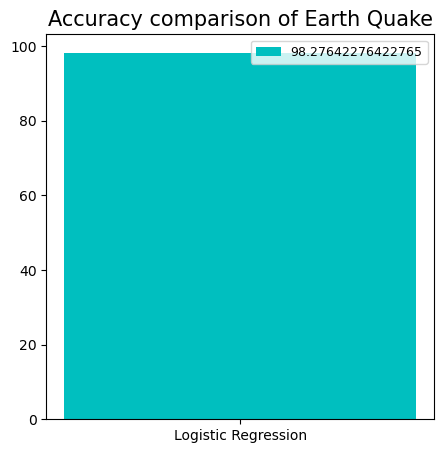

In [26]:
graph()

In [27]:
TP = cm1[0][0]
FP = cm1[1][0]
FN = cm1[1][1]
TN = cm1[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

True Positive : 785
True Negative : 4
False Positive : 6
False Negative : 128

True Positive Rate : 0.859802847754655
True Negative Rate : 0.4
False Positive Rate : 0.6
False Negative Rate : 0.140197152245345

Positive Predictive Value : 0.9924146649810367
Negative predictive value : 0.030303030303030304


Confusion matrix-Logistic_Regression:
[[785   4]
 [  6 128]]


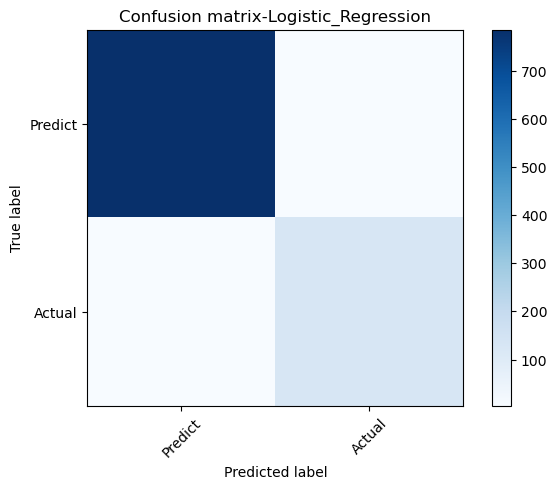

In [28]:
def plot_confusion_matrix(cm1, title='Confusion matrix-Logistic_Regression', cmap=plt.cm.Blues):
    target_names=['Predict','Actual']
    plt.imshow(cm1, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = n.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm1=confusion_matrix(y_test, predictLR)
print('Confusion matrix-Logistic_Regression:')
print(cm1)
plot_confusion_matrix(cm1)

Confusion matrix-Logistic_Regression:
[[785   4]
 [  6 128]]


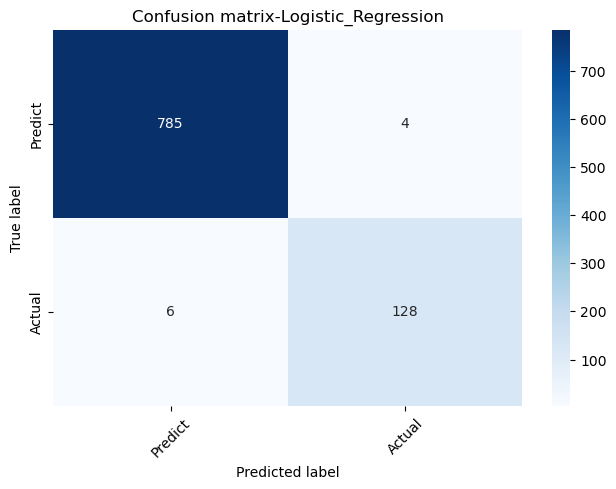

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, title='Confusion matrix-Logistic_Regression'):
    target_names = ['Predict', 'Actual']
    
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
    plt.title(title)
    
    tick_marks = n.arange(len(target_names))
    plt.xticks(tick_marks+0.5, target_names, rotation=45)
    plt.yticks(tick_marks+0.5, target_names)
    plt.tight_layout()
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

# Example usage
cm = confusion_matrix(y_test, predictLR)
print('Confusion matrix-Logistic_Regression:')
print(cm)
plot_confusion_matrix(cm)
plt.show()

Confusion matrix-Logistic_Regression:
[[785   4]
 [  6 128]]


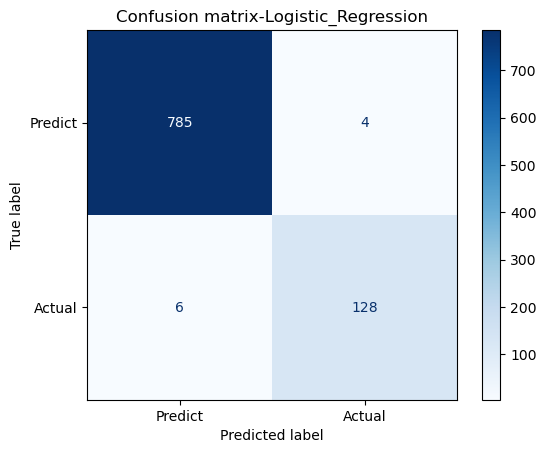

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Example usage
cm = confusion_matrix(y_test, predictLR)
print('Confusion matrix-Logistic_Regression:')
print(cm)

# Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Predict', 'Actual'])
disp.plot(cmap='Blues')
plt.title('Confusion matrix-Logistic_Regression')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()



Creating pkl File

In [15]:
import joblib
joblib.dump(logR,'lr.pkl')

['lr.pkl']